In [1]:
# -------------------------------------------
# Importing Libraries and Setup
# -------------------------------------------

# TensorFlow is a deep learning framework developed by Google.
# It provides tools for building and training neural networks.
import tensorflow as tf

# The 'datasets', 'layers', and 'models' modules from Keras
# (which is integrated into TensorFlow) are used to load data,
# build CNN layers, and define sequential or functional models.
from tensorflow.keras import datasets, layers, models

# Matplotlib is used for visualizing images, accuracy, and loss curves.
import matplotlib.pyplot as plt

# NumPy is a library for numerical operations and handling image data arrays.
import numpy as np

# Converts integer labels into one-hot encoded vectors (e.g., 3 → [0,0,0,1,0,...])
# which is essential for training classification models.
from tensorflow.keras.utils import to_categorical

# -------------------------------------------
# Notes:
# - Keras is built on top of TensorFlow and simplifies neural network creation.
# - PyTorch can also be used for CNNs and large-scale architectures (e.g., LLMs).
# - Unlike Keras, PyTorch handles parallelism more flexibly and natively.
# -------------------------------------------

"""
📘 Summary:
This cell imports all required libraries for building and training a CNN model using TensorFlow and Keras.
It also prepares tools for visualization (matplotlib) and preprocessing (NumPy and to_categorical).
"""


'\n📘 Summary:\nThis cell imports all required libraries for building and training a CNN model using TensorFlow and Keras.\nIt also prepares tools for visualization (matplotlib) and preprocessing (NumPy and to_categorical).\n'

In [2]:
# -------------------------------------------
# Loading and Preprocessing the MNIST Dataset
# -------------------------------------------

# Import the MNIST dataset (handwritten digits 0–9)
# It comes pre-split into training and testing sets.
from tensorflow.keras.datasets import mnist

# Utility function to convert class labels into one-hot encoded form.
from tensorflow.keras.utils import to_categorical

# NumPy for numerical operations (array slicing, normalization, etc.)
import numpy as np

# TensorFlow backend (Keras is built on top of TensorFlow)
import tensorflow as tf


# -------------------------------------------
# Load Dataset
# -------------------------------------------
# The MNIST dataset contains 70,000 grayscale images (28x28 pixels each):
# 60,000 for training and 10,000 for testing.
# The function automatically splits the data into (features, labels).
# Can load other datasets directly also like : datasets.cifar10.load_data()
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Example:
# X_train.shape -> (60000, 28, 28)
# y_train contains digit labels (0–9) corresponding to each image.


# -------------------------------------------
# Subset Selection (for faster training/demo)
# -------------------------------------------

subset_size = 5000  # use a smaller subset of data for quicker experimentation

# Select the first 5,000 samples from the training data
X_train = X_train[:subset_size]
y_train = y_train[:subset_size]

# Select 1,000 samples from the test data (5000 - 4000)
X_test = X_test[:subset_size - 4000]
y_test = y_test[:subset_size - 4000]


# -------------------------------------------
# Normalization
# -------------------------------------------
# Each pixel in the MNIST images has an intensity value between 0 and 255.
# Neural networks train more efficiently when input values are small and consistent.
# Dividing by 255.0 scales all pixel values to the range [0, 1].
# This helps stabilize gradients and speeds up convergence during training.

X_train = X_train / 255.0
X_test = X_test / 255.0


"""
📘 Summary:
This cell loads the MNIST handwritten digit dataset, reduces its size for quicker training,
and normalizes pixel values to a 0–1 range. Normalization ensures that the CNN trains
efficiently by preventing large gradient updates.
"""


'\n📘 Summary:\nThis cell loads the MNIST handwritten digit dataset, reduces its size for quicker training,\nand normalizes pixel values to a 0–1 range. Normalization ensures that the CNN trains\nefficiently by preventing large gradient updates.\n'

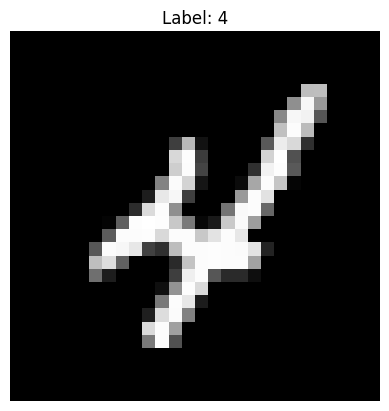

'\n📘 Summary:\nThis cell visualizes one sample image from the normalized MNIST dataset\nto confirm that the data has been loaded and processed correctly.\nNormalization can make images appear slightly faded, but they still\ncontain all the necessary information for training a CNN.\n'

In [3]:
# -------------------------------------------
# Visualizing a Sample Image from the Dataset
# -------------------------------------------

# Import matplotlib for image visualization
import matplotlib.pyplot as plt

# Display the 10th image (index 9) from the training dataset
# 'cmap="gray"' renders it as a grayscale image instead of default RGB.
plt.imshow(X_train[9], cmap='gray')

# Show the corresponding label for the selected image
plt.title(f"Label: {y_train[9]}")

# Remove the x and y axis ticks for cleaner display
plt.axis('off')

# Render the image
plt.show()

# Note: The image might look slightly lighter/distorted because of normalization
# since all pixel values are scaled between 0 and 1 instead of 0–255.
# This is normal and does not affect the model’s performance.
"""
📘 Summary:
This cell visualizes one sample image from the normalized MNIST dataset
to confirm that the data has been loaded and processed correctly.
Normalization can make images appear slightly faded, but they still
contain all the necessary information for training a CNN.
"""


In [4]:
# -------------------------------------------
# Checking the Shape of the Test Dataset
# -------------------------------------------

# Display the dimensions of the test data array
# Expected output format: (num_samples, height, width)
# Since MNIST images are 28x28 pixels, and we selected 1000 samples earlier,
# the result should be something like (1000, 28, 28)
X_test.shape

"""
📘 Summary:
This line checks the shape of the test dataset to verify the number of samples
and image dimensions after subsetting. It helps confirm that preprocessing and slicing
were applied correctly before reshaping or feeding data into the CNN.
"""


'\n📘 Summary:\nThis line checks the shape of the test dataset to verify the number of samples\nand image dimensions after subsetting. It helps confirm that preprocessing and slicing\nwere applied correctly before reshaping or feeding data into the CNN.\n'

In [5]:
# -------------------------------------------
# Checking the Shape of the Training Labels
# -------------------------------------------

# Display the dimensions of the training labels (y_train)
# Each element in y_train corresponds to the class label (0–9)
# for its matching image in X_train.
# Expected output: (5000,) since we selected 5000 samples earlier.
y_train.shape

"""
📘 Summary:
This line checks the number of training labels to ensure they match the number
of training images. It confirms that the dataset slicing was applied correctly
and that each image still has its corresponding label before one-hot encoding.
"""


'\n📘 Summary:\nThis line checks the number of training labels to ensure they match the number\nof training images. It confirms that the dataset slicing was applied correctly\nand that each image still has its corresponding label before one-hot encoding.\n'

In [6]:
# -------------------------------------------
# Converting Labels to One-Hot Encoded Format
# -------------------------------------------

# Each label in y_train and y_test currently represents a class index (0–9).
# Neural networks often require these labels to be converted into one-hot encoded vectors
# for use with the 'categorical_crossentropy' loss function.
#
# Example:
# Label: 3  →  One-hot vector: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

# If you choose to use one-hot encoding, then the appropriate loss function would be 'categorical_crossentropy'.
# If you choose *not* to use one-hot encoding, then the appropriate loss function would be 'sparse_categorical_crossentropy' instead.

# Convert integer labels into one-hot encoded vectors with 10 classes
# (Uncomment these lines to apply one-hot encoding)

# y_train = to_categorical(y_train, 10)
# y_test = to_categorical(y_test, 10)

"""
📘 Summary:
This cell prepares the target labels for training by explaining how to convert
integer class labels into one-hot encoded form. One-hot encoding is required
when using 'categorical_crossentropy', while 'sparse_categorical_crossentropy'
can be used directly with integer labels. Both achieve the same goal of
computing class probabilities, but in slightly different input formats.
"""


"\n📘 Summary:\nThis cell prepares the target labels for training by explaining how to convert\ninteger class labels into one-hot encoded form. One-hot encoding is required\nwhen using 'categorical_crossentropy', while 'sparse_categorical_crossentropy'\ncan be used directly with integer labels. Both achieve the same goal of\ncomputing class probabilities, but in slightly different input formats.\n"

In [7]:
# -------------------------------------------
# Building a Basic Artificial Neural Network (ANN)
# -------------------------------------------

# The Sequential API allows stacking layers one after another in a linear fashion.
ann = models.Sequential([

    # The Flatten layer converts each 28x28 image into a 1D vector of size 784 (28*28).
    # This is necessary because dense (fully connected) layers accept 1D input only.
    layers.Flatten(input_shape=(28, 28)),

    # First hidden layer with 3000 neurons.
    # ReLU (Rectified Linear Unit) activation introduces non-linearity
    # and helps the network learn complex patterns.
    layers.Dense(3000, activation='relu'),

    # Second hidden layer with 1000 neurons, also using ReLU.
    # Stacking dense layers deepens the network and improves feature learning.
    layers.Dense(1000, activation='relu'),

    # Output layer with 10 neurons, one for each MNIST digit (0–9).
    # Softmax converts the outputs into probabilities that sum to 1.
    layers.Dense(10, activation='softmax')
])

# -------------------------------------------
# Compiling the Model
# -------------------------------------------

# The Adam optimizer combines momentum and adaptive learning rates
# for efficient and fast convergence.
# Since labels are integers (not one-hot encoded),
# we use 'sparse_categorical_crossentropy' as the loss function.
ann.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']  # Track accuracy during training and evaluation
)

# Display a summary of the model architecture
# including layer types, output shapes, and number of trainable parameters.
ann.summary()

"""
📘 Summary:
This cell builds and compiles a simple ANN for handwritten digit classification.
The network flattens each image, passes it through two hidden layers with ReLU activation,
and outputs class probabilities using Softmax. The model is trained using the Adam optimizer
and sparse categorical cross-entropy loss because the labels are integer-encoded.
"""


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3000)           │     2,355,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1000)           │     3,001,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,366,010 (20.47 MB)

 Trainable params: 5,366,010 (20.47 MB)

 Non-trainable params: 0 (0.00 B)

'\n📘 Summary:\nThis cell builds and compiles a simple ANN for handwritten digit classification.\nThe network flattens each image, passes it through two hidden layers with ReLU activation,\nand outputs class probabilities using Softmax. The model is trained using the Adam optimizer\nand sparse categorical cross-entropy loss because the labels are integer-encoded.\n'

In [8]:
# -------------------------------------------
# Training the Artificial Neural Network (ANN)
# -------------------------------------------

# Train the ANN model using the training data for 3 epochs.
# Each epoch means one full pass through the entire training dataset.
# 'batch_size' determines how many samples are processed before updating the model weights.
ann.fit(X_train, y_train, epochs=3, batch_size=32)

# -------------------------------------------
# Notes on Batch Size and Iterations
# -------------------------------------------

# Number of iterations (steps per epoch) = Total training samples / batch_size
# For example, 5000 samples / 32 ≈ 157 iterations per epoch.

# Smaller batch size:
# - More weight updates → captures fine-grained/local patterns.
# - Slower training but may lead to better generalization.

# Larger batch size:
# - Fewer updates per epoch → faster training.
# - May lose some critical local variations in data.

"""
📘 Summary:
This cell trains the ANN for 3 epochs using mini-batches of 32 images each.
The batch size controls how frequently model weights are updated during training.
Smaller batches increase iteration count and improve sensitivity to detail,
while larger batches speed up training but may reduce fine-grained learning.
"""


Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 76ms/step - accuracy: 0.7774 - loss: 0.6910
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - accuracy: 0.9518 - loss: 0.1541
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 74ms/step - accuracy: 0.9753 - loss: 0.0770


'\n📘 Summary:\nThis cell trains the ANN for 3 epochs using mini-batches of 32 images each.\nThe batch size controls how frequently model weights are updated during training.\nSmaller batches increase iteration count and improve sensitivity to detail,\nwhile larger batches speed up training but may reduce fine-grained learning.\n'

In [9]:
# -------------------------------------------
# Evaluating Model Performance
# -------------------------------------------

# Import performance evaluation tools from scikit-learn
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Use the trained ANN model to make predictions on the test set
# The output (y_pred) will contain probability distributions for each of the 10 classes.
y_pred = ann.predict(X_test)

# Convert predicted probability vectors into class indices (0–9)
# np.argmax() selects the index of the maximum probability in each prediction.
y_pred_classes = [np.argmax(element) for element in y_pred]

# Display a detailed classification report
# Includes precision, recall, F1-score, and support for each class.
print("Classification Report:\n", classification_report(y_test, y_pred_classes))

"""
📘 Summary:
This cell evaluates the trained ANN using the test dataset.
Predicted probabilities are converted into class labels using argmax.
The classification report summarizes model performance across all 10 digits
by showing metrics like precision (accuracy per class), recall (sensitivity),
and F1-score (balance between precision and recall).
"""


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        85
           1       0.97      1.00      0.98       126
           2       0.93      0.96      0.94       116
           3       0.82      0.93      0.87       107
           4       0.93      0.87      0.90       110
           5       0.91      0.93      0.92        87
           6       0.94      0.94      0.94        87
           7       0.97      0.70      0.81        99
           8       0.88      0.91      0.90        89
           9       0.86      0.91      0.89        94

    accuracy                           0.92      1000
   macro avg       0.92      0.91      0.91      1000
weighted avg       0.92      0.92      0.91      1000



'\n📘 Summary:\nThis cell evaluates the trained ANN using the test dataset.\nPredicted probabilities are converted into class labels using argmax.\nThe classification report summarizes model performance across all 10 digits\nby showing metrics like precision (accuracy per class), recall (sensitivity),\nand F1-score (balance between precision and recall).\n'

In [10]:
# -------------------------------------------
# Building a Convolutional Neural Network (CNN)
# -------------------------------------------

# Sequential API: stack layers in a linear order (input → output)
cnn = models.Sequential([

    # 1️⃣ First Convolutional Layer
    # Applies 32 filters (kernels) of size 3x3 to the input image.
    # Each kernel slides across the image to detect local patterns (edges, curves, textures).
    # 'activation="relu"' introduces non-linearity.
    # Input shape is (28, 28, 1) — 28x28 grayscale image with 1 channel.
    # The kernel weights are initialized randomly and learned during training.
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),

    # 2️⃣ Max Pooling Layer
    # Reduces spatial dimensions (downsamples) by taking the max value in each 2x2 region.
    # Helps extract dominant features and reduces computation.
    layers.MaxPooling2D((2, 2)),

    # 3️⃣ Second Convolutional Layer
    # Adds more filters (64) to learn more complex patterns and higher-level features.
    # Kernel size again is 3x3, with ReLU activation.
    # Can optionally specify stride or padding here (e.g., padding='same').
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),

    # 4️⃣ Second Max Pooling Layer
    # Further reduces the feature map size to make learning efficient.
    layers.MaxPooling2D((2, 2)),

    # 5️⃣ Flatten Layer
    # Converts the 2D feature maps into a 1D vector.
    # This step is required before feeding into fully connected (dense) layers.
    layers.Flatten(),

    # 6️⃣ Fully Connected (Dense) Layer
    # 64 neurons with ReLU activation — combines extracted features to form class-level patterns.
    layers.Dense(64, activation='relu'),

    # 7️⃣ Output Layer
    # 10 neurons (one for each digit 0–9), using softmax to output class probabilities.
    layers.Dense(10, activation='softmax')
])

"""
📘 Summary:
This CNN model processes input images through a hierarchy of convolution and pooling layers
to automatically extract spatial features. After flattening, dense layers perform classification.
Key elements:
- Conv2D layers learn local features via sliding kernels.
- MaxPooling2D layers downsample to reduce complexity.
- Flatten + Dense layers handle final classification.
"""


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


'\n📘 Summary:\nThis CNN model processes input images through a hierarchy of convolution and pooling layers\nto automatically extract spatial features. After flattening, dense layers perform classification.\nKey elements:\n- Conv2D layers learn local features via sliding kernels.\n- MaxPooling2D layers downsample to reduce complexity.\n- Flatten + Dense layers handle final classification.\n'

In [11]:
#Sigmoid
0.4
0.5
0.6

0.6

In [12]:
#Softmax
(0.4)/(0.4+0.5+0.6)



# -------------------------------------------
# Understanding Sigmoid vs Softmax Activation
# -------------------------------------------

# Sigmoid: Each output neuron acts independently and outputs a value between 0 and 1.
# Example:
# For logits [0.4, 0.5, 0.6], sigmoid would be applied individually to each.

# Softmax: Converts all logits into a probability distribution over classes.
# Example:
# For raw values [0.4, 0.5, 0.6], softmax normalizes them:
# 0.4 / (0.4 + 0.5 + 0.6), etc.
# The outputs sum to 1.0 and represent probabilities for multi-class prediction.

"""
📘 Summary:
This snippet conceptually demonstrates how sigmoid handles independent probabilities
for each neuron, while softmax distributes probability across all classes so that
the sum equals 1. It helps students understand why softmax is used for classification layers.
"""


'\n📘 Summary:\nThis snippet conceptually demonstrates how sigmoid handles independent probabilities\nfor each neuron, while softmax distributes probability across all classes so that\nthe sum equals 1. It helps students understand why softmax is used for classification layers.\n'

In [13]:
# -------------------------------------------
# Compiling the Convolutional Neural Network
# -------------------------------------------

# The compile() method configures the model for training.
cnn.compile(
    optimizer='adam',                     # Adam optimizer adapts learning rates automatically for each parameter.
    loss='sparse_categorical_crossentropy', # Used when labels are integer-encoded (not one-hot).
    metrics=['accuracy']                  # Tracks accuracy during training and evaluation.
)

# Notes:
# - If labels were one-hot encoded, we’d use 'categorical_crossentropy' instead.
# - The optimizer, loss, and metrics determine how the model learns and how performance is measured.

"""
📘 Summary:
This cell compiles the CNN model by specifying how it should learn.
It uses the Adam optimizer for efficient gradient updates,
the sparse categorical cross-entropy loss for integer-based class labels,
and accuracy as the performance metric.
"""


'\n📘 Summary:\nThis cell compiles the CNN model by specifying how it should learn.\nIt uses the Adam optimizer for efficient gradient updates,\nthe sparse categorical cross-entropy loss for integer-based class labels,\nand accuracy as the performance metric.\n'

In [14]:
cnn.fit(X_train, y_train, epochs=3)

Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.6237 - loss: 1.2363
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.9528 - loss: 0.1742
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9671 - loss: 0.1084


CNN's are best for image classification and gives superb accuracy. As, at the end 3 of epochs,

1.   Accuracy was at around 96% - a significant improvement over ANN
2.   Also, Extremly less computation compared to simple ANN
1.   As, Maxpooling reduces the image dimensions while still preserving the features.








In [15]:
# -------------------------------------------
# Evaluating the CNN on Test Data
# -------------------------------------------

# Evaluate the trained CNN model on unseen test data.
# This method returns two values:
# 1️⃣ Test loss  → how well the model fits the data (lower is better)
# 2️⃣ Test accuracy → how many predictions were correct (higher is better)
cnn.evaluate(X_test, y_test)

# The evaluation helps determine how well the model generalizes
# beyond the training dataset, revealing potential overfitting or underfitting.

"""
📘 Summary:
This cell tests the trained CNN on the test dataset to measure its performance.
The evaluate() function returns loss and accuracy metrics,
which indicate how well the CNN can classify new, unseen images.
"""


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9747 - loss: 0.0834


'\n📘 Summary:\nThis cell tests the trained CNN on the test dataset to measure its performance.\nThe evaluate() function returns loss and accuracy metrics,\nwhich indicate how well the CNN can classify new, unseen images.\n'